In [353]:
import pandas as pd
# Import Dataset to the variable
file_path = ("C:\MY DATA\Yoobee\SecondT\DA\Assingment2\dataset for assignment 2.csv")
data = pd.read_csv(file_path)
data.head()

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sweer\AppData\Local\Temp\ipykernel_22740\2849266886.py:3: SyntaxWarning: invalid escape sequence '\M'
  file_path = ("C:\MY DATA\Yoobee\SecondT\DA\Assingment2\dataset for assignment 2.csv")


,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439


In [355]:
# Data cleansing and noise removal
missing_values = data.isnull().sum()
# Drop the 'User ID' because its incremetal value and noise data
data = data.drop(columns=['User ID'])
# Data One-Hot Encoding to convert labels or categorical dat into a numerical format 
encoded_data = pd.get_dummies(data, columns=['Gender', 'Activity Level', 'Location'])
encoded_data.head()

,Age,App Sessions,Distance Travelled (km),Calories Burned,Gender_Female,Gender_Male,Activity Level_Active,Activity Level_Moderate,Activity Level_Sedentary,Location_Rural,Location_Suburban,Location_Urban
0,22,151,140,728,True,False,True,False,False,False,True,False
1,50,157,115,523,False,True,True,False,False,True,False,False
2,36,178,163,795,False,True,True,False,False,False,False,True
3,36,155,85,715,True,False,True,False,False,False,True,False
4,34,95,71,439,False,True,False,False,True,True,False,False


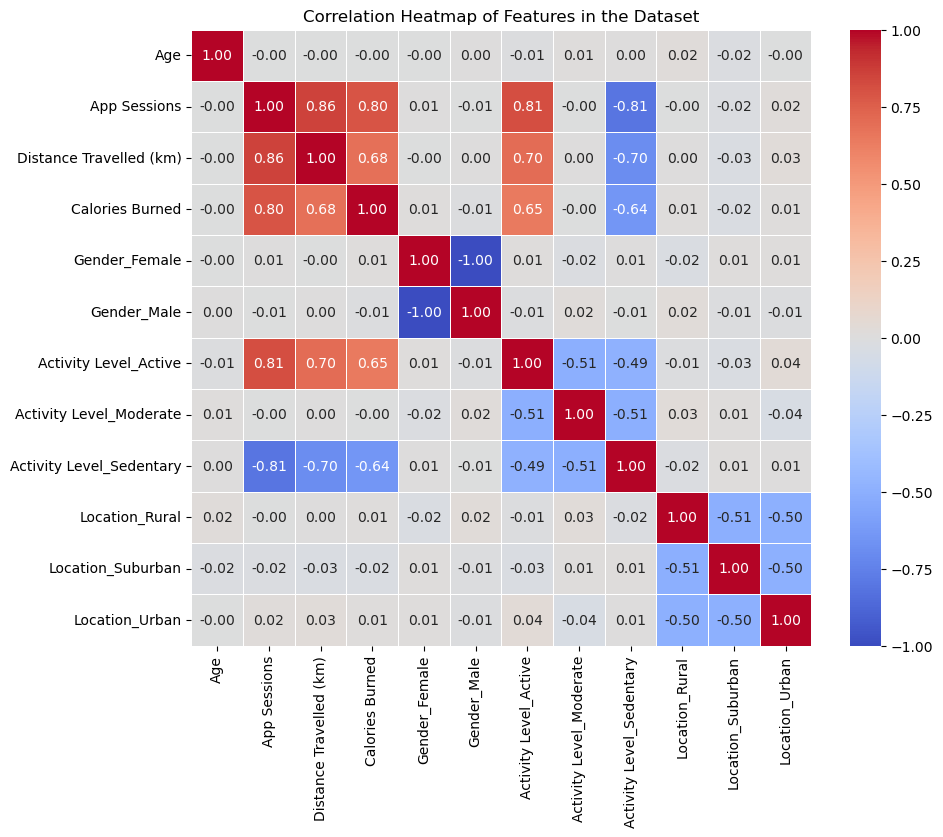

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a correlation matrix besed on the encoded data in the previous step
correlation_matrix = encoded_data.corr()

# Plot a heatmap for the correlation matrix to undestand the correlation between the variables in the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features in the Dataset')
plt.show()

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the predictors (features) and target variables as per the above explaned. 
X = encoded_data.drop(columns=['Gender_Male','Gender_Female','App Sessions','Calories Burned'])  # Drop target variables and ID
y_app_sessions = encoded_data['App Sessions']  # 1 Target for App Sessions
y_calories = encoded_data['Calories Burned']  # 2 Target for Calories Burned

# Split the data into training and testing sets (80% train, 20% test) as per the standard presentation
X_train_app_sess, X_test_app_sess, train_app_sess, test_app_sess = train_test_split(X, y_app_sessions, test_size=0.2, random_state=42)
X_train_cal_be, X_test_cal_be, train_cal_be, y_test_cal = train_test_split(X, y_calories, test_size=0.2, random_state=42)

# Initialize the linear regression model
model_App_sessions = LinearRegression()
model_calories_Berned = LinearRegression()

# Fit the model to the training data
model_App_sessions.fit(X_train_app_sess, train_app_sess)
model_calories_Berned.fit(X_train_cal_be, train_cal_be)

# Predict on the test set
y_pred_sess = model_App_sessions.predict(X_test_app_sess)
y_pred_cal = model_calories_Berned.predict(X_test_cal_be)

# Evaluate the models
mse_sessions = mean_squared_error(test_app_sess, y_pred_sess)
r2_sessions = r2_score(test_app_sess, y_pred_sess)

mse_calories = mean_squared_error(y_test_cal, y_pred_cal)
r2_calories = r2_score(y_test_cal, y_pred_cal)

# Below are the evaluation of models
print(f"App Sessions Model - MSE: {mse_sessions}, R2: {r2_sessions}")
print(f"Calories Burned Model - MSE: {mse_calories}, R2: {r2_calories}")

App Sessions Model - MSE: 163.91722404757655, R2: 0.9119314433477139
Calories Burned Model - MSE: 15155.357529244755, R2: 0.5798899300780385


C:\Users\sweer\AppData\Local\Temp\ipykernel_22740\2630280580.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', color="red", lw=2, label="Absolute Prediction")


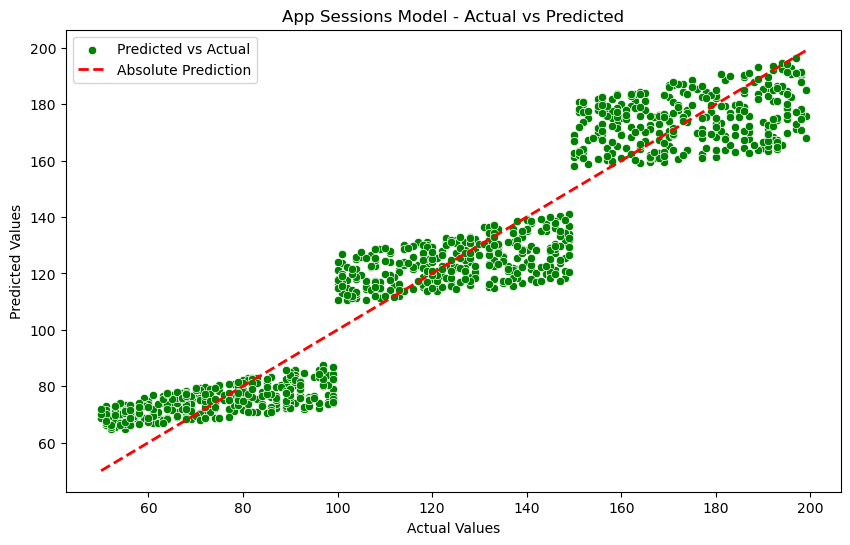

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot regression results
def plot_regression_results(y_test, y_pred, title):
    # Create a scatter plot of Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, color="green", label="Predicted vs Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', color="red", lw=2, label="Absolute Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{title} - Actual vs Predicted")
    plt.legend()
    plt.show()

# Function to plot regression results
def plot_regression_resultsCla(y_test, y_pred, title):
    # Create a scatter plot of Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', color="red", lw=2, label="Absolute Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{title} - Actual vs Predicted")
    plt.legend()
    plt.show()

# Plot for App Sessions
plot_regression_results(test_app_sess, y_pred_sess, "App Sessions Model")

C:\Users\sweer\AppData\Local\Temp\ipykernel_22740\2630280580.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', color="red", lw=2, label="Absolute Prediction")


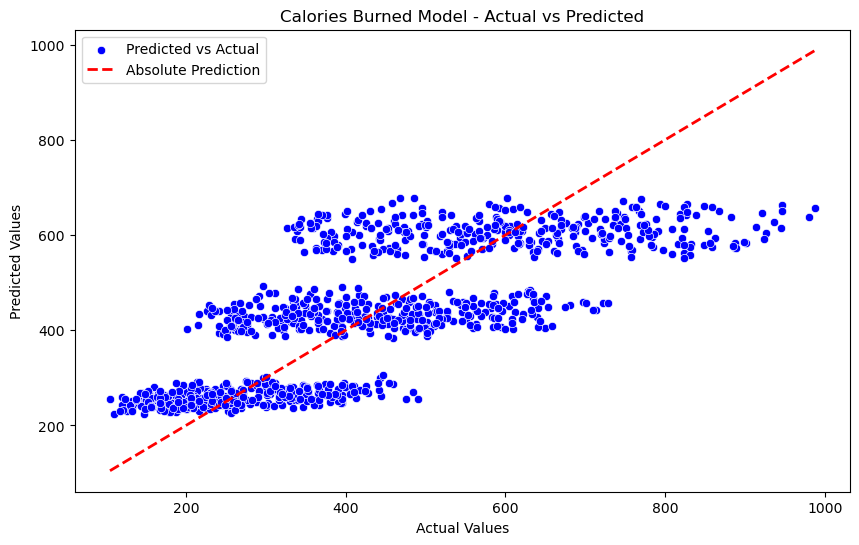

In [363]:
# Plot for Calories Burned

plot_regression_resultsCla(y_test_cal, y_pred_cal, "Calories Burned Model")

In [365]:
from sklearn.ensemble import RandomForestRegressor
 
# Initialize the Random Forest Regressor
rf_sessions = RandomForestRegressor(n_estimators=100, random_state=42)
rf_calories = RandomForestRegressor(n_estimators=100, random_state=42)
 
# Train the Random Forest models on each target variable
rf_sessions.fit(X_train_app_sess, train_app_sess)
rf_calories.fit(X_train_cal_be, train_cal_be)
 
# Predict on the test set
y_pred_sess = rf_sessions.predict(X_test_app_sess)
y_pred_cal = rf_calories.predict(X_test_cal_be)
 
# Evaluate the models using Mean Squared Error and R^2 Score
mse_sessions = mean_squared_error(test_app_sess, y_pred_sess)
r2_sessions = r2_score(test_app_sess, y_pred_sess)
 
mse_calories = mean_squared_error(y_test_cal, y_pred_cal)
r2_calories = r2_score(y_test_cal, y_pred_cal)
 
# Print the evaluation metrics
print(f"App Sessions Model - MSE: {mse_sessions:.2f}, R^2 Score: {r2_sessions:.2f}")
print(f"Calories Burned Model - MSE: {mse_calories:.2f}, R^2 Score: {r2_calories:.2f}")

App Sessions Model - MSE: 176.88, R^2 Score: 0.90
Calories Burned Model - MSE: 18781.41, R^2 Score: 0.48


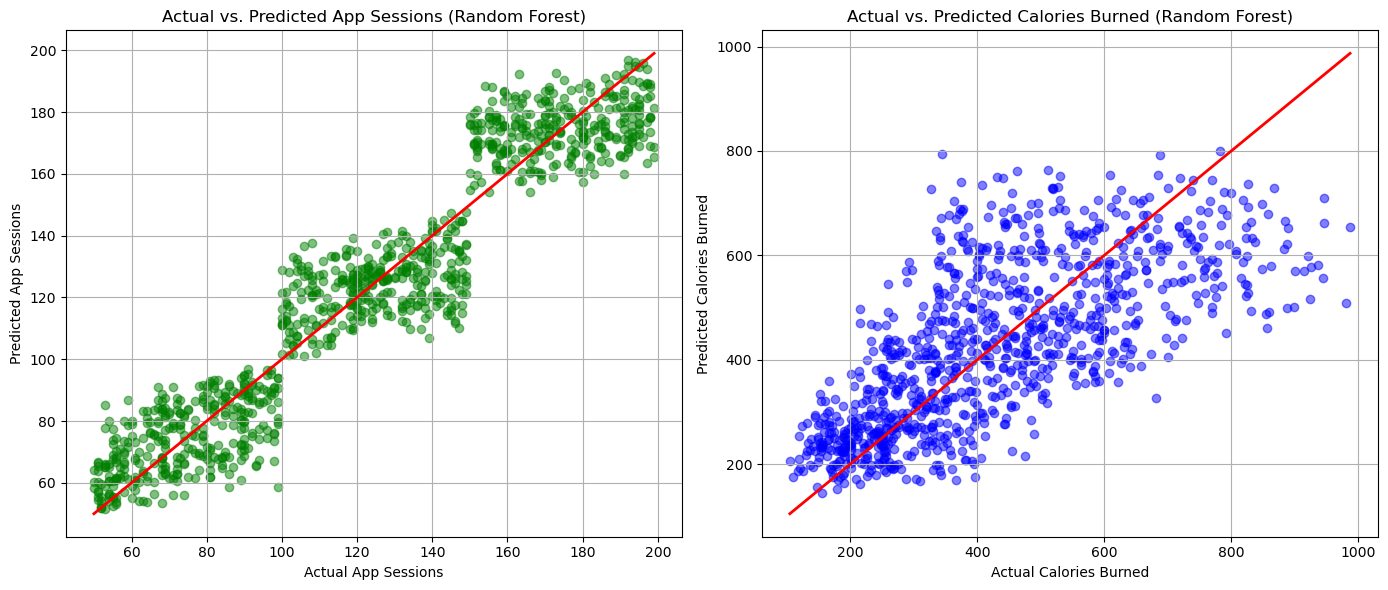

In [366]:
import matplotlib.pyplot as plt

# Plot for Random Forest model predictions on App Sessions and Calories Burned
plt.figure(figsize=(14, 6))

# Subplot for App Sessions
plt.subplot(1, 2, 1)
plt.scatter(test_app_sess, y_pred_sess, color="green", alpha=0.5)
plt.plot([test_app_sess.min(), test_app_sess.max()], [test_app_sess.min(), test_app_sess.max()], color="red", lw=2)
plt.xlabel("Actual App Sessions")
plt.ylabel("Predicted App Sessions")
plt.title("Actual vs. Predicted App Sessions (Random Forest)")
plt.grid(True)

# Subplot for Calories Burned
plt.subplot(1, 2, 2)
plt.scatter(y_test_cal, y_pred_cal, color="blue", alpha=0.5)
plt.plot([y_test_cal.min(), y_test_cal.max()], [y_test_cal.min(), y_test_cal.max()], color="red", lw=2)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs. Predicted Calories Burned (Random Forest)")
plt.grid(True)

plt.tight_layout()
plt.show()

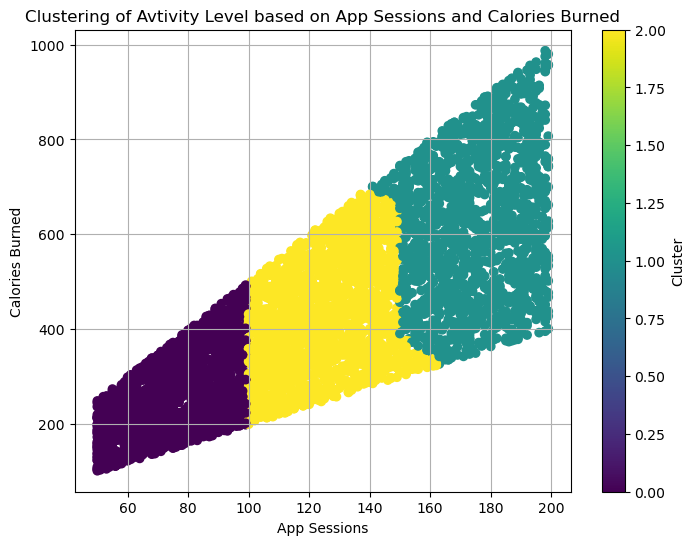

,Activity Level,App Sessions,Calories Burned
0,0,151,728
1,0,157,523
2,0,178,795
3,0,155,715
4,2,95,439
...,...,...,...
95,1,143,608
96,1,100,277
97,2,91,195
98,1,113,406


In [422]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

#Encode categorical variables for custering
label_encoder = LabelEncoder()
data['Activity Level'] = label_encoder.fit_transform(data['Activity Level'])  # Encode Activity Level

#Like wise we can do same for the Location and Gender too

#Select features and normalize them
features = data[['Activity Level', 'App Sessions', 'Calories Burned']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


#Apply K-Means clustering with k=3 (optimal k determined earlier besically for 3 main activity level)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

#Add cluster labels to the data
data['Cluster'] = clusters

# Plot the clustering results (using App Sessions and Calories Burned as per the Activity level)
plt.figure(figsize=(8, 6))
plt.scatter(data['App Sessions'], data['Calories Burned'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering of Avtivity Level based on App Sessions and Calories Burned')
plt.xlabel('App Sessions')
plt.ylabel('Calories Burned')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
features.head(100)